In [1]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole

RDKit WARNING: [01:18:54] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
mol1 = Chem.MolFromSmiles("Cc1ccccc1")
mol2 = Chem.MolFromSmiles("Clc1ccccc1")

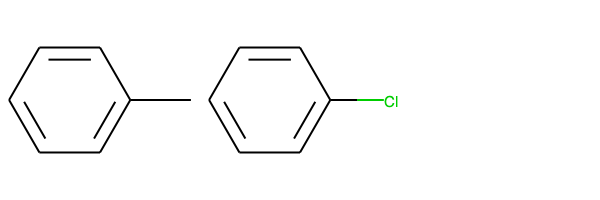

In [3]:
Draw.MolsToGridImage([mol1, mol2])

In [4]:
fp1 = AllChem.GetMorganFingerprint(mol1, 2)
fp2 = AllChem.GetMorganFingerprint(mol2, 2)

In [6]:
DataStructs.TanimotoSimilarity(fp1, fp2)

0.5384615384615384

## Virtual Screening

In [7]:
!wget http://files.docking.org/2D/EA/EAED.smi

--2020-03-18 01:19:20--  http://files.docking.org/2D/EA/EAED.smi
files.docking.org (files.docking.org) をDNSに問いあわせています... 169.230.26.43
files.docking.org (files.docking.org)|169.230.26.43|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 8075585 (7.7M) [application/smil]
`EAED.smi' に保存中

EAED.smi            100%[===================>]   7.70M  6.68MB/s 時間 1.2s     

2020-03-18 01:19:24 (6.68 MB/s) - `EAED.smi' へ保存完了 [8075585/8075585]



In [8]:
laninamivir = Chem.MolFromSmiles("CO[C@H]([C@H](O)CO)[C@@H]1OC(=C[C@H](NC(=N)N)[C@H]1NC(=O)C)C(=O)O")
laninamivir_fp = AllChem.GetMorganFingerprint(laninamivir, 2)

def calc_laninamivir_similarity(mol):
    fp = AllChem.GetMorganFingerprint(mol, 2)
    sim = DataStructs.TanimotoSimilarity(laninamivir_fp, fp)
    return sim

In [9]:
spl = Chem.rdmolfiles.SmilesMolSupplier("EAED.smi")
len(spl)

117956

In [10]:
similar_mols =[]
for mol in spl:
    sim = calc_laninamivir_similarity(mol)
    if sim > 0.2:
        similar_mols.append((mol, sim))

In [11]:
similar_mols.sort(key=lambda x: x[1], reverse=True)

In [13]:
type(similar_mols)

list

In [15]:
similar_mols[0]

(<rdkit.Chem.rdchem.Mol at 0x123b12e90>, 0.23529411764705882)

In [16]:
similar_mols[0][1]

0.23529411764705882

In [48]:
mols = [l[0] for l in similar_mols[:30]]

In [49]:
mols

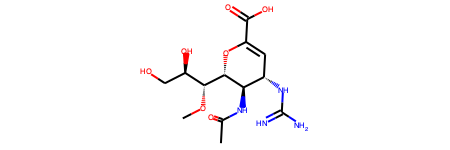

In [50]:
laninamivir

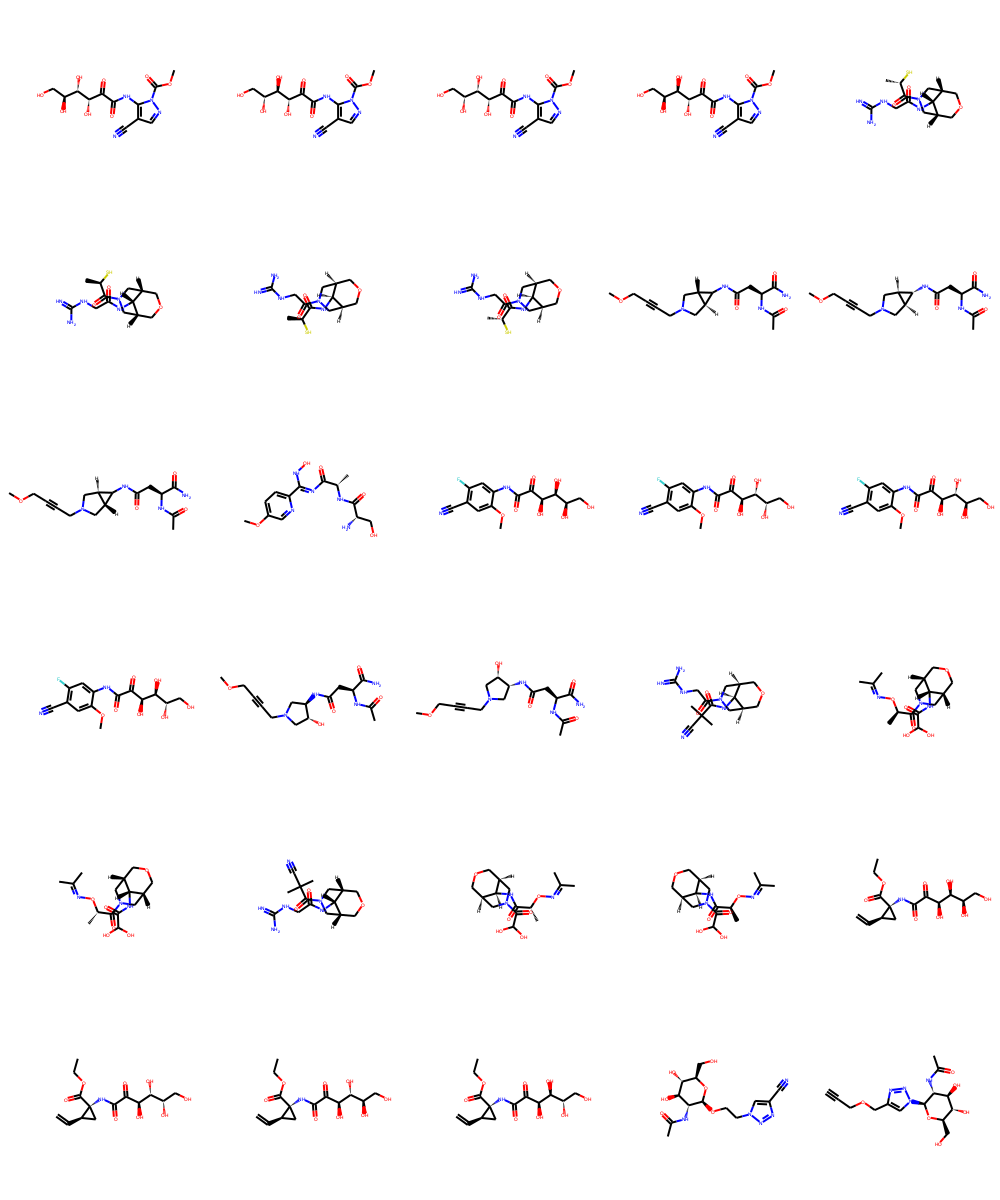

In [51]:
Draw.MolsToGridImage(mols, molsPerRow=5)

## クラスタリング

In [23]:
from rdkit.ML.Cluster import Butina

In [31]:
mols = Chem.SDMolSupplier("ch06_nov_hts.sdf")

fps = []
valid_mols = []
for mol in mols:
    if mol is not None:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
        fps.append(fp)
        valid_mols.append(mol)

RDKit WARNING: [01:22:22] WARNING: Distance matrix is too long
RDKit WARNING: [01:22:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit ERROR: [01:22:48] ERROR: Counts line too short: '' on line51330
RDKit ERROR: [01:22:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [01:22:48] ERROR: Counts line too short: '' on line51499
RDKit ERROR: [01:22:48] ERROR: moving to the begining of the next molecule
RDKit ERROR: [01:22:48] ERROR: Counts line too short: '' on line52431


In [32]:
len(mols)

5611

In [33]:
distance_matrix = []
for i, fp in enumerate(fps):
    similarities = DataStructs.BulkTanimotoSimilarity(fps[i], fps[:i+1])
    distance_matrix.extend([1-sim for sim in similarities])

In [34]:
clusters = Butina.ClusterData(distance_matrix, len(fps), 0.2, isDistData=True)

In [35]:
len(clusters)

2492

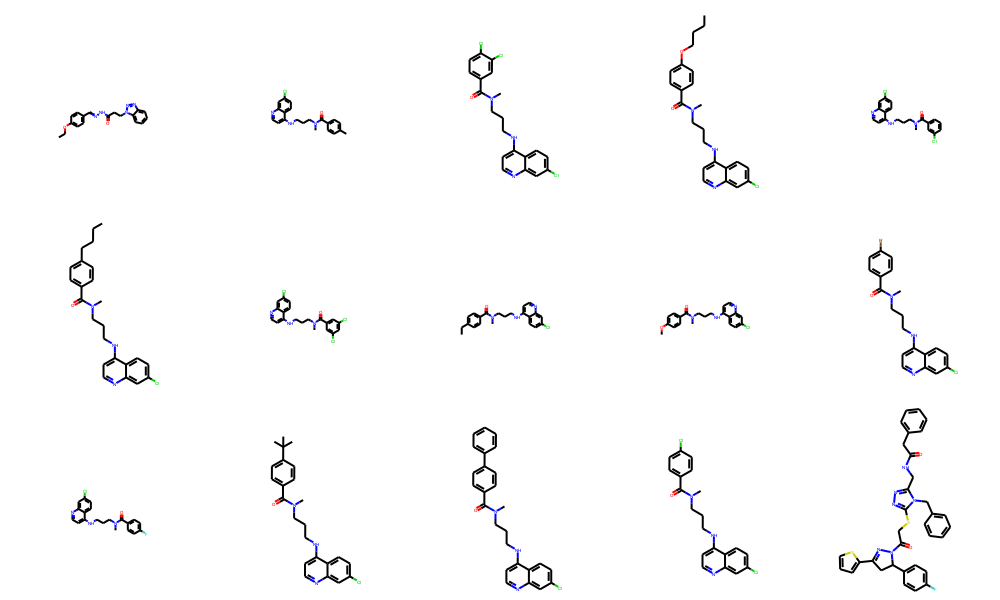

In [38]:
mols_ =[valid_mols[i] for i in clusters[0]]
Draw.MolsToGridImage(mols_, molsPerRow=5)

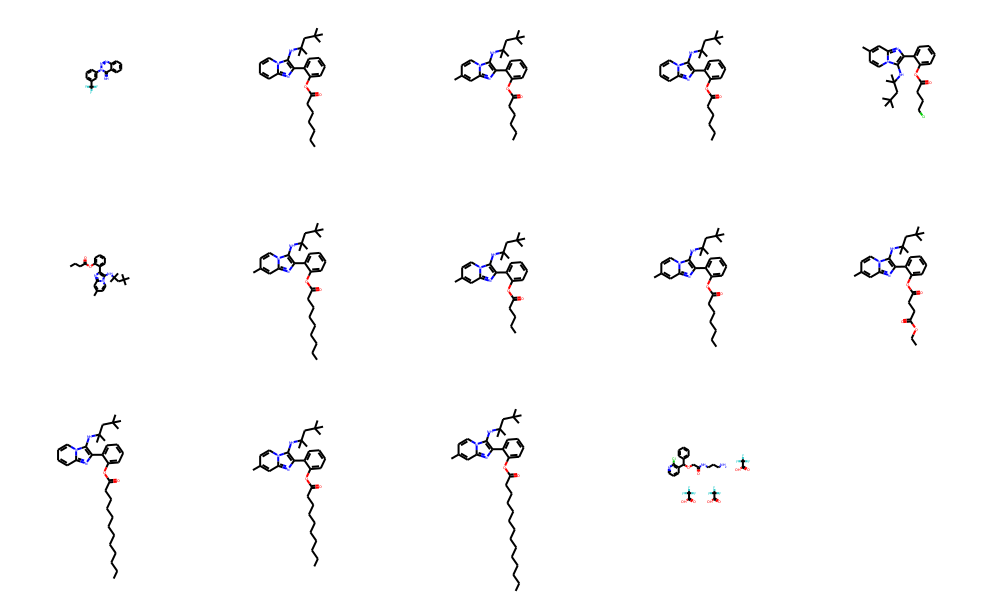

In [39]:
mols_ =[valid_mols[i] for i in clusters[1]]
Draw.MolsToGridImage(mols_, molsPerRow=5)

#### SBDD

In [44]:
apx = Chem.MolFromSmiles("COc1ccc(cc1)n2nc(C(=O)N)c3CCN(C(=O)c23)c4ccc(cc4)N5CCCCC5=O")
rvx = Chem.MolFromSmiles("Clc1ccc(s1)C(=O)NC[C@H]2CN(C(=O)O2)c3ccc(cc3)N4CCOCC4=O")

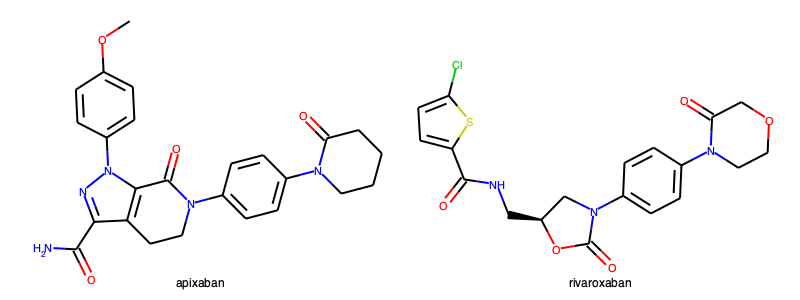

In [45]:
Draw.MolsToGridImage([apx, rvx], legends=["apixaban", "rivaroxaban"], subImgSize=(400, 300), molsPerRow=2)

In [46]:
apx_fp = AllChem.GetMorganFingerprint(apx, 2)
rvx_fp = AllChem.GetMorganFingerprint(rvx, 2)

In [47]:
DataStructs.TanimotoSimilarity(apx_fp, rvx_fp)

0.3235294117647059